✅ Total images loaded: 8

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Confusion Matrix:
 [[1 0]
 [0 1]]


<Figure size 500x400 with 0 Axes>

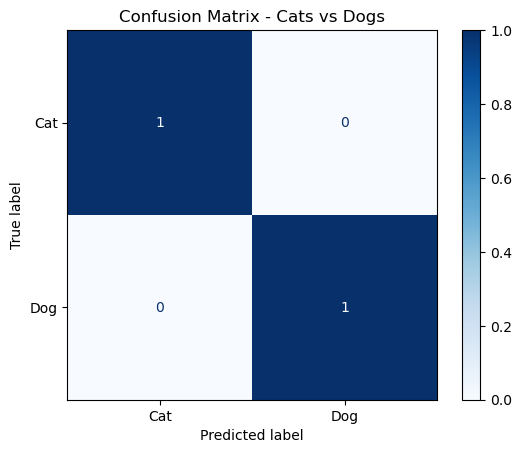

In [1]:
# 🐱🐶 Cats vs Dogs Classification using SVM (No TensorFlow, uses PIL)

import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from PIL import Image

# -----------------------------
# 1. Load images from folders
# -----------------------------
def load_images_from_folder(folder, label, image_size=(64, 64)):
    images, labels = [], []
    for filename in os.listdir(folder):
        if filename.lower().endswith((".jpg", ".jpeg", ".png")):
            path = os.path.join(folder, filename)
            img = Image.open(path).convert("RGB").resize(image_size)
            img_array = np.array(img) / 255.0
            images.append(img_array.flatten())
            labels.append(label)
    return images, labels

# -----------------------------
# 2. Load Dataset
# -----------------------------
cat_images, cat_labels = load_images_from_folder("dataset/cat", 0)
dog_images, dog_labels = load_images_from_folder("dataset/dog", 1)

X = np.array(cat_images + dog_images)
y = np.array(cat_labels + dog_labels)

print(f"✅ Total images loaded: {len(X)}")

# -----------------------------
# 3. Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------
# 4. Train the SVM Model
# -----------------------------
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# -----------------------------
# 5. Predict & Evaluate
# -----------------------------
y_pred = model.predict(X_test)

# Print results
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save classification report to output folder
os.makedirs("output", exist_ok=True)
with open("output/classification_report.txt", "w") as f:
    f.write("Classification Report:\n")
    f.write(classification_report(y_test, y_pred))

# -----------------------------
# 6. Save Confusion Matrix Plot
# -----------------------------
plt.figure(figsize=(5, 4))
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=["Cat", "Dog"], cmap='Blues')
plt.title("Confusion Matrix - Cats vs Dogs")
plt.savefig("output/confusion_matrix.png")
plt.show()
